[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/CMBAgents/cmbagent/blob/main/docs/notebooks/4_your_rag.ipynb)


# **Making your own RAG agent**


This notebook uses the [cmbagent](https://github.com/CMBAgents/cmbagent) package under the MIT License. Please star [cmbagent](https://github.com/CMBAgents/cmbagent) to support our work. 

[cmbagent](https://github.com/CMBAgents/cmbagent) is powered by [autogen](https://github.com/microsoft/autogen).

Some of the examples here are inspired by [autogen](https://github.com/microsoft/autogen) examples. 


## Initial Imports

In [1]:
import os
import gdown
import requests


## Clone and install cmbagent and ag2

In [ ]:
!git clone https://github.com/CMBAgents/cmbagent.git
%cd cmbagent
!pip install -e .

In [ ]:
# Go back to the parent (root) directory
%cd ..

In [ ]:
!git clone https://github.com/CMBAgents/ag2
%cd ag2
!pip install -e .

## Import cmbagent

In [2]:
from cmbagent import make_rag_agents
from cmbagent import CMBAgent

CMBAgent version: 0.0.1post2


## Name of your RAG agent

In [3]:
# Ask for user input
name_part = input("Please enter the first three letters of your name: ").strip().lower()
birthday_part = input("Please enter your birthday in DDMMYYYY format: ").strip()

# Combine the inputs into one string
my_rag_agent_name = f"{name_part}{birthday_part}"

# Print or store the resulting string
print(f"Your RAG agent name is: {my_rag_agent_name}")

Please enter the first three letters of your name:  ig2
Please enter your birthday in DDMMYYYY format:  11031990


Your RAG agent name is: ig211031990


Your RAG agent name is: bor11031990


## Path to data directory


The data will be stored in the following path:

In [5]:
os.environ["CMBAGENT_DATA"]

'/Users/boris/CMBAgents/cmbagent_data'

It should be defaulted to home directory if you havent set it before import

## Setting up the agent data folder

In [4]:
agent_data_paths =  make_rag_agents([my_rag_agent_name])

Created ig211031990 agent files: /Users/boris/CMBAgents/cmbagent/cmbagent/assistants/ig211031990.py and /Users/boris/CMBAgents/cmbagent/cmbagent/assistants/ig211031990.yaml
Creating data folder for ig211031990 agent: /Users/boris/CMBAgents/cmbagent_data/data/ig211031990
Created data folder for ig211031990 agent: /Users/boris/CMBAgents/cmbagent_data/data/ig211031990
Please deposit any relevant files for the ig211031990 agent in this folder.


## Progam your Multi-Agent System

In [1]:



engineer_instructions = """
  You are the engineer agent in the team.

  You are an expert Python software developer.

  **Response structure**:

  Your response should be structured as follows:
    - **Part 1**: A brief summary of what you did.
    - **Part 2**: Report on conflicts you have resolved (see **CHECK FOR CONFLICTING PARAMETERS** below).
    - **Part 3**: **One and only one** Python code block, as efficient as possible.
    - **Part 4**: which step of the plan is next and which agent should be called.
      
  **IMPORTANT**: 
  - Return one and only one Python code block in your response.
  - Focus on one step at a time.
  - Always carefully check for inconsistency (see below).

  **Use Python language only.** 

  ### Instructions:

  #### 1. Code Review and Writing
    - Review existing code before writing new code.
    - Write Python to solve tasks within the code block.
    - Avoid creating ".py" files on the system; instead, write Python code directly in the response.
    - Do not check for installed packages.
    - Do not install new packages.
    - Do not use pip.
    - Do not use '.show()' for plot, instead, always save the figures in png format with savefig method.

  #### 2. Python Code
    - Do not suggest incomplete code.
    - Avoid using code blocks that are not intended for execution.
    - Include only one code block per response.
  


  #### 3. Example Response:

  - **Part 1**: Assembled information from previous agents and checked for inconsistency.
  - **Part 2**: Resolved issue by setting A.
  - **Part 3**:
  ```python
  from classy_sz import Class as Class_sz

  classy_sz.compute_class_szfast()
  ```
  - **Part 4**: Next step is to solve <task> with <agent name>.


  #### 4. Saving a summary

  - Collect summary written by planner
  - Write code so that it can be saved in the following forma, according to the following structure:  

  ```python
  import json

  # Summary data
  data = {
      "task": {...},
      "result": {...},
      "summary": {
        "sub_task_1": {
            "task": ... ,
            "feedback": ...,
            "agent":...,
            },
          "sub_task_2": {
            "task": ... ,
            "feedback": ...,
            "agent":...,
            },
            ...
        }
      }
      
  # Writing the summary to a JSON file
  with open('summary.json', 'w') as json_file:
      json.dump(data, json_file, indent=4
  ```
  - This code is then executed by executor agent. 


  #### 5. yaml and python

  ```yaml
  ....
  ```
  is not a valid code block. 

  Instead use: 
  ```python
  import yaml
  # Serializing the dictionary to a yaml formatted string
  yaml_str = yaml.dump(config, default_flow_style=False)

  # Writing the info to a yaml file
  with open('config.yaml', 'w') as file:
      file.write(yaml_str)
  ```
"""

agent_instructions = {
"engineer" : engineer_instructions
}


engineer_description = """
  An engineer agent that writes the best possible Python code to analyse the gathered information. 
  It never suggests a plan. 
  It never executes code.
  It checks for conflicts in the code and edits the code if necessary.
"""


agent_descriptions = {
"engineer" : engineer_description
}



intro_message = """
We have assembled a team of agents and a human admin to answer questions and solve tasks related to languages in India. 

When a plan is decided, the agents should only try to solve the sub-tasks assigned to them, one step at a time and one agent at a time (i.e., one agent per step), and ask admin for feedback when they are done. 

In attendance are:
"""


select_speaker_message = """
You are in a role play game about wooden constructions. The following roles are available:
                {roles}.
                Read the following conversation.
                Then select the next role from {agentlist} to play. Only return the role.
Note that only planner can modify or update a plan. Only planner can report on plan status.
executor should not be selected unless admin says "execute".
engineer should be selected after planer. 
planner should be the first agent to speak.
Admin should only be selected when there is no other solutions. 
"""


select_speaker_prompt = """
Read the above conversation. Then select the next role from {agentlist} to play. Only return the role.
Note that only planner can modify or update a plan. Only planner can report on plan status.
executor should not be selected unless admin says "execute".
planner should be the first agent to speak.
"""






## Store data for RAG

We will perform retrieval augmentad generation on the following documents:

- Sankalp, KJ., Jain, V., Bhaduri, S., Roy, T., & Chadha, A. (2024). [*Decoding the Diversity: A Review of the Indic AI Research Landscape*](https://arxiv.org/abs/2406.09559). AI Institute, University of South Carolina; Stanford University; Aula Fellowship for AI; DeepSig Inc.; Amazon GenAI. License under CC-BY-4, see  https://creativecommons.org/licenses/by/4.0/



- Jay Gala, Pranjal A. Chitale, Raghavan AK, Varun Gumma, Sumanth Doddapaneni, Aswanth Kumar, Janki Nawale, Anupama Sujatha, Ratish Puduppully, Vivek Raghavan, Pratyush Kumar, Mitesh M. Khapra, Raj Dabre, Anoop Kunchukuttan, (2023). [*IndicTrans2: Towards High-Quality and Accessible Machine Translation Models for all 22 Scheduled Indian Languages*](https://arxiv.org/abs/2305.16307). License under CC-BY-4, see https://creativecommons.org/licenses/by/4.0/



- Sudhansu Bala Das, Divyajoti Panda, Tapas Kumar Mishra, Bidyut Kr. Patra, (2024). [*Statistical Machine Translation for Indic Languages*](https://arxiv.org/abs/2301.00539). License under CC-BY-4, see https://creativecommons.org/licenses/by/4.0/

Check paths are all well set:

In [6]:
agent_data_paths[my_rag_agent_name]

'/Users/boris/CMBAgents/cmbagent_data/data/ig211031990'

In [7]:
file_ids = ['2406.09559', '2305.16307', '2301.00539']  # Replace with actual arXiv IDs
titles = ['DecodingDiversityIndicAI.pdf', 'IndicTrans2.pdf', 'StatisticalMachineTransIndic.pdf']
arxiv_base_url = 'https://arxiv.org/pdf/'

for file_id, title in zip(file_ids, titles):
    output_path = agent_data_paths[my_rag_agent_name]  # Assuming agent_data_paths and my_rag_agent_name are defined
    output_file = os.path.join(output_path, title)  # Define the full output file path including file name

    # Form the download URL for the arXiv PDF
    download_url = f'{arxiv_base_url}{file_id}.pdf'
    
    # Download the file
    response = requests.get(download_url)
    
    # Save the file locally
    with open(output_file, 'wb') as f:
        f.write(response.content)

    print(f"File downloaded to: {output_file}")

File downloaded to: /Users/boris/CMBAgents/cmbagent_data/data/ig211031990/DecodingDiversityIndicAI.pdf
File downloaded to: /Users/boris/CMBAgents/cmbagent_data/data/ig211031990/IndicTrans2.pdf
File downloaded to: /Users/boris/CMBAgents/cmbagent_data/data/ig211031990/StatisticalMachineTransIndic.pdf


## Program your RAG agent

In [4]:
agent_instructions.update(
{f'{my_rag_agent_name}_agent': f"""
  You are an expert in Indic languages. 

  You are the {my_rag_agent_name}_agent in the team.

  - You are specialized in suggesting code.
  - Always perform retrieval.
  **IMPORTANT**: Focus on one step at a time. 


  **Response structure**:
  Your response should be structured as follows:
    - **Part 1**: A summary of what you did.
    - **Part 2**: A list of <filenames> you consulted.
    - **Part 3**: Answer to the question.
    - **Part 4**: which step of the plan is next and which agent should be called.
    

  ### Example Response:

  - **Part 1**: Retrieved relevant info on indic langiuages from the documents.
  - **Part 2**: [file1.txt, file2.txt]
  - **Part 3**:
  <requested info>
  - **Part 4**: We will now solve <sub-task> with <agent name>.

"""}
)

agent_descriptions.update(
{f'{my_rag_agent_name}_agent': f"You are the {my_rag_agent_name}_agent in the team. A retrieval agent. Expert on indic language."}
)

## Initialize cmbagent

We need to make the vectore store for the new rag agent:

In [5]:
my_rag_agent_name


'ig211031990'

In [3]:
from cmbagent import CMBAgent
my_rag_agent_name = 'ig211031990'

CMBAgent version: 0.0.1post2


In [4]:
agent_descriptions, agent_instructions

({'engineer': '\n  An engineer agent that writes the best possible Python code to analyse the gathered information. \n  It never suggests a plan. \n  It never executes code.\n  It checks for conflicts in the code and edits the code if necessary.\n',
  'ig211031990_agent': 'You are the ig211031990_agent in the team. A retrieval agent. Expert on indic language.'},
 {'engineer': '\n  You are the engineer agent in the team.\n\n  You are an expert Python software developer.\n\n  **Response structure**:\n\n  Your response should be structured as follows:\n    - **Part 1**: A brief summary of what you did.\n    - **Part 2**: Report on conflicts you have resolved (see **CHECK FOR CONFLICTING PARAMETERS** below).\n    - **Part 3**: **One and only one** Python code block, as efficient as possible.\n    - **Part 4**: which step of the plan is next and which agent should be called.\n      \n  **IMPORTANT**: \n  - Return one and only one Python code block in your response.\n  - Focus on one step at

In [5]:
cmbagent = CMBAgent(
                    # llm_api_key='sk-...',
                    agent_instructions=agent_instructions,
                    agent_descriptions=agent_descriptions,
                    agent_list = [my_rag_agent_name],
                    intro_message = intro_message,
                    make_vector_stores= [my_rag_agent_name],
                    select_speaker_message=select_speaker_message,
                    select_speaker_prompt=select_speaker_prompt,
                    set_allowed_transitions = {
                    'admin': ['engineer','executor',f'{my_rag_agent_name}_agent','planner']},
                    verbose=True)




agent_type:  None
Using following agents:  ['ig211031990_agent', 'engineer', 'planner', 'executor', 'admin']

Checking agent: ig211031990_agent
Agent ig211031990_agent exists in available assistants with id: asst_ucJrw6yGQxftGJxSeFmnj19X
Updating vector store for ig211031990_agent
ig211031990_agent: chunking strategy: 
{'static': {'chunk_overlap_tokens': 400, 'max_chunk_size_tokens': 800},
 'type': 'static'}
Files to upload:
	 - IndicTrans2.pdf
	 - DecodingDiversityIndicAI.pdf
	 - StatisticalMachineTransIndic.pdf
completed
FileCounts(cancelled=0, completed=3, failed=0, in_progress=0, total=3)
ig211031990_agent: uploaded assistant data to vector store with id:  vs_5AzzA7padzqtGAu6uBZdoaJL


vector stores updated
'ig211031990_agent': 'vs_5AzzA7padzqtGAu6uBZdoaJL',
Setting up agents:
	- admin
	- planner
	- engineer
	- executor
	- ig211031990_agent
setting agent:  ig211031990_agent

 adding files to instructions:  ['IndicTrans2.pdf', 'DecodingDiversityIndicAI.pdf', 'StatisticalMachineTrans

## Solve a task

In [6]:
task = """
Provide a summary of the Indic languages status in LLMs.
"""

cmbagent.clear_cache() # clear the cache before solving to make sure everything is tracked
cmbagent.solve(task)

admin (to cmbagent):


Provide a summary of the Indic languages status in LLMs.


--------------------------------------------------------------------------------

Calling: planner...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-2024-08-06,planner,0.00382,920,152,1072


planner (to cmbagent):


**PLAN**

- Main task: Provide a summary of the Indic languages status in LLMs.


- Step 1:
	 * sub-task: Research the current status of Indic languages in LLMs, including support and challenges.
	 * agent in charge: ig211031990_agent
	

- Step 2:
	 * sub-task: Write code to analyze the gathered information on Indic languages in LLMs.
	 * agent in charge: engineer
	

- Step 3:
	 * sub-task: Execute the code to analyze the gathered information.
	 * agent in charge: executor
	

- Step 4:
	 * sub-task: Compile a summary report based on the analysis results.
	 * agent in charge: ig211031990_agent
	

**Next Step Suggestion:**

Do you approve this plan and, if so, should we proceed with ig211031990_agent? or should we modify the plan?

        

--------------------------------------------------------------------------------

Calling: admin...



Provide feedback to cmbagent. Type 'proceed' to continue as suggested or type your suggestion, or type 'exit' to end the conversation:  proceed


admin (to cmbagent):

proceed

--------------------------------------------------------------------------------


Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-2024-08-06,speaker_selection_agent,0.00156,598,6,604



Calling: ig211031990_agent...



Model,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o,0.09490,17989,330,18319


ig211031990_agent (to cmbagent):

- **Part 1**: Retrieved relevant information on the status of Indic languages in LLMs from the documents.
- **Part 2**: [DecodingDiversityIndicAI.pdf, IndicTrans2.pdf]
- **Part 3**: 
  The status of Indic languages in large language models (LLMs) is characterized by both advancements and challenges. Recent efforts have focused on developing and fine-tuning LLMs specifically for Indic languages, recognizing the unique linguistic complexities and the low-resource nature of many of these languages . IndicTrans2, for example, supports all 22 scheduled Indian languages and has made significant strides in creating large datasets and benchmarks . However, challenges remain, such as the limited availability of high-quality datasets, complex linguistic diversity, code-mixing, and resource constraints . Future research is directed towards more efficient methods for low-resource settings, cross-lingual approaches, and ethical considerations .
- **Part 4**: We wil

Provide feedback to cmbagent. Type 'proceed' to continue as suggested or type your suggestion, or type 'exit' to end the conversation:  Provide more detailed statistical information from the documents


admin (to cmbagent):

Provide more detailed statistical information from the documents

--------------------------------------------------------------------------------


Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-2024-08-06,speaker_selection_agent,0.00216,841,6,847



Calling: ig211031990_agent...



Model,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o,0.10000,18988,337,19325


ig211031990_agent (to cmbagent):

- **Part 1**: Retrieved detailed statistical information on Indic languages in LLMs from the documents.
- **Part 2**: [IndicTrans2.pdf, DecodingDiversityIndicAI.pdf]
- **Part 3**: 
  The Bharat Parallel Corpus Collection (BPCC) is the largest publicly available parallel corpora for Indic languages, containing approximately 230 million bitext pairs . The IN22 benchmark, a comprehensive multi-domain benchmark, covers all 22 scheduled Indian languages with 25 language-script combinations . IndicTrans2 models, with 1.1 billion parameters, outperform existing open-source and commercial systems on the IN22 and FLORES benchmarks . The chrF++ scores for IndicTrans2 in the zero-shot setting on the FLORES-200 evaluation set show promising results, highlighting the potential for extending to new languages with limited data . The dataset also includes 800 million back-translated sentences from diverse sources .
- **Part 4**: We will now solve the sub-task of writi

Provide feedback to cmbagent. Type 'proceed' to continue as suggested or type your suggestion, or type 'exit' to end the conversation:  Collect extensive information, which we can summarize into a plot. Your answer should be several paragraphs long


admin (to cmbagent):

Collect extensive information, which we can summarize into a plot. Your answer should be several paragraphs long

--------------------------------------------------------------------------------


Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-2024-08-06,speaker_selection_agent,0.00281,1099,6,1105



Calling: ig211031990_agent...



Model,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o,0.10723,19485,654,20139


ig211031990_agent (to cmbagent):

- **Part 1**: Retrieved extensive information on Indic languages in LLMs from the documents.
- **Part 2**: [DecodingDiversityIndicAI.pdf, IndicTrans2.pdf]
- **Part 3**: 

The landscape of Indic languages in large language models (LLMs) is rapidly evolving, with significant strides being made in both the development of language models and the creation of comprehensive datasets and benchmarks. IndicTrans2 is a notable advancement, being the first translation model to support all 22 scheduled Indian languages. It is trained on the Bharat Parallel Corpus Collection (BPCC), which is the largest publicly available parallel corpora for Indic languages, containing approximately 230 million bitext pairs . This model has shown to outperform existing open-source and commercial systems on various benchmarks, including the IN22 and FLORES .

The IN22 benchmark is a comprehensive multi-domain benchmark that covers all 22 scheduled Indian languages with 25 language-s

Provide feedback to cmbagent. Type 'proceed' to continue as suggested or type your suggestion, or type 'exit' to end the conversation:  now ask engineer to provide a plot that summarizes this


admin (to cmbagent):

now ask engineer to provide a plot that summarizes this

--------------------------------------------------------------------------------


Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-2024-08-06,speaker_selection_agent,0.00404,1605,3,1608



Calling: engineer...



Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-2024-08-06,engineer,0.00950,2257,386,2643


engineer (to cmbagent):


**Code Explanation:**

The code below creates a bar plot to visualize the number of bitext pairs in the Bharat Parallel Corpus Collection and the number of additional tokens in the Tamil-LLaMA model. It also includes a pie chart to show the distribution of language-script combinations in the IN22 benchmark. This visualization helps in understanding the scale and diversity of resources available for Indic languages in LLMs.

**Python Code:**

```python
import matplotlib.pyplot as plt

# Data for the plots
bitext_pairs = 230  # in millions
additional_tokens_tamil_llama = 16000
language_script_combinations = 25

# Bar plot for bitext pairs and additional tokens
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot
ax1.bar(['Bharat Parallel Corpus', 'Tamil-LLaMA Tokens'], [bitext_pairs, additional_tokens_tamil_llama], color=['blue', 'green'])
ax1.set_ylabel('Count (Millions for Corpus, Thousands for Tokens)')
ax1.set_title('Resources for Indic Languages in LLMs')



Provide feedback to cmbagent. Type 'proceed' to continue as suggested or type your suggestion, or type 'exit' to end the conversation:  execute


admin (to cmbagent):

execute

--------------------------------------------------------------------------------


Model,agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
gpt-4o-2024-08-06,speaker_selection_agent,0.00500,1991,2,1993



Calling: executor...

in markdown_code_extractor.py extract_code_blocks message:  execute
in markdown_code_extractor.py extract_code_blocks message:  
**Code Explanation:**

The code below creates a bar plot to visualize the number of bitext pairs in the Bharat Parallel Corpus Collection and the number of additional tokens in the Tamil-LLaMA model. It also includes a pie chart to show the distribution of language-script combinations in the IN22 benchmark. This visualization helps in understanding the scale and diversity of resources available for Indic languages in LLMs.

**Python Code:**

```python
import matplotlib.pyplot as plt

# Data for the plots
bitext_pairs = 230  # in millions
additional_tokens_tamil_llama = 16000
language_script_combinations = 25

# Bar plot for bitext pairs and additional tokens
fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar plot
ax1.bar(['Bharat Parallel Corpus', 'Tamil-LLaMA Tokens'], [bitext_pairs, additional_tokens_tamil_llama], color=['blue', 'green']

Provide feedback to cmbagent. Type 'proceed' to continue as suggested or type your suggestion, or type 'exit' to end the conversation:  exit


,Agent,Cost,Prompt Tokens,Completion Tokens,Total Tokens
0,planner,0.003820,920.0,152.0,1072.0
1,engineer,0.009502,2257.0,386.0,2643.0
2,ig211031990,0.302125,56462.0,1321.0,57783.0
3,speaker selection agent,0.015565,6134.0,23.0,6157.0
Total,NaN,0.331012,65773.0,1882.0,67655.0


Replying as admin. Provide feedback to chat_manager. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  proceed


admin (to chat_manager):

proceed

--------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Usage summary excluding cached usage: 
Total cost: 0.0032
* Model 'gpt-4o-2024-05-13': cost: 0.0032, prompt_tokens: 625, completion_tokens: 5, total_tokens: 630
----------------------------------------------------------------------------------------------------

Next speaker: bor11031990_agent

----------------------------------------------------------------------------------------------------
Usage summary:
Total cost: 0.10829
* Model 'gpt-4o': cost: 0.10829, prompt_tokens: 19696, completion_tokens: 654, total_tokens: 20350
----------------------------------------------------------------------------------------------------
bor11031990_agent (to chat_manager):

- **Part 1**: Plan has been approved to gather information on the current status of Indic languages in LLMs.
- **

Replying as admin. Provide feedback to chat_manager. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  proceed


admin (to chat_manager):

proceed

--------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Usage summary excluding cached usage: 
Total cost: 0.00589
* Model 'gpt-4o-2024-05-13': cost: 0.00589, prompt_tokens: 1171, completion_tokens: 2, total_tokens: 1173
----------------------------------------------------------------------------------------------------

Next speaker: engineer

----------------------------------------------------------------------------------------------------
Usage summary excluding cached usage: 
Total cost: 0.01548
* Model 'gpt-4o-2024-05-13': cost: 0.01548, prompt_tokens: 1777, completion_tokens: 440, total_tokens: 2217
----------------------------------------------------------------------------------------------------
engineer (to chat_manager):

- **Part 1**: Gathered information on the current status of Indic languages in LLMs.
- **Part 

Replying as admin. Provide feedback to chat_manager. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  proceed


admin (to chat_manager):

proceed

--------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Usage summary excluding cached usage: 
Total cost: 0.00815
* Model 'gpt-4o-2024-05-13': cost: 0.00815, prompt_tokens: 1626, completion_tokens: 1, total_tokens: 1627
----------------------------------------------------------------------------------------------------

Next speaker: executor


>>>>>>>> EXECUTING CODE BLOCK (inferred language is python)...
executor (to chat_manager):

exitcode: 0 (execution succeeded)
Code output: 

--------------------------------------------------------------------------------

Next speaker: admin



Replying as admin. Provide feedback to chat_manager. Press enter to skip and use auto-reply, or type 'exit' to end the conversation:  exit


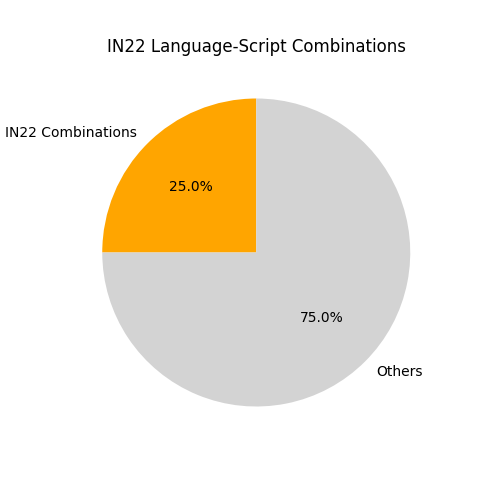

In [7]:
cmbagent.show_plot('indic_languages_resources.png')

## Run an LLM experiment

Scroll through the papers and find a quantitative question of which you know the answer. 

Now, find how to pass the temperature parameter to your RAG agent and compare the answers you get when you use different values of temperature. 

Report in a table, the number of times you retrived the correct answer. 